#Preguntas:
###1-¿Cuál es la distribución de las puntuaciones Del Mini Examen Del Estado Mental (MMSE) en el conjunto de datos?
###2- ¿Qué relación hay entre la edad y el diagnóstico de alzhéimer?
###3- ¿Cuál es la proporción de pacientes con el genotipo APOE4?
###4- ¿Qué relación hay entre el genotipo APOE y el diagnóstico de alzhéimer?
###5- ¿Cuál es la evolución del Nivel Cognitivo (MMSE) según el Diagnóstico (DX)?
###6- ¿Cómo se distribuyen los pacientes según su subtipo de diagnóstico?


In [67]:
#Base de datos original
url_datos_original = "https://raw.githubusercontent.com/ianCristianAriel/2023-sistemapredictivo-Alzheimer/main/datos/procesados/data_EDA.csv"

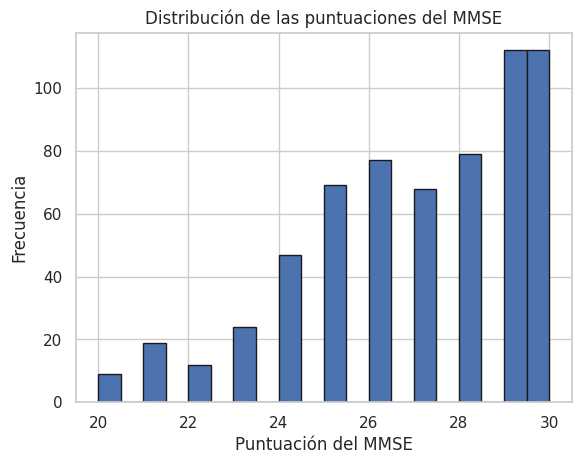

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde la URL
df = pd.read_csv(url_datos_original)

# Calcular la distribución de las puntuaciones del MMSE
mmse_scores = df['MMSE']

# Crear un histograma para visualizar la distribución
plt.hist(mmse_scores, bins=20, edgecolor='k')
plt.xlabel('Puntuación del MMSE')
plt.ylabel('Frecuencia')
plt.title('Distribución de las puntuaciones del MMSE')
plt.show()

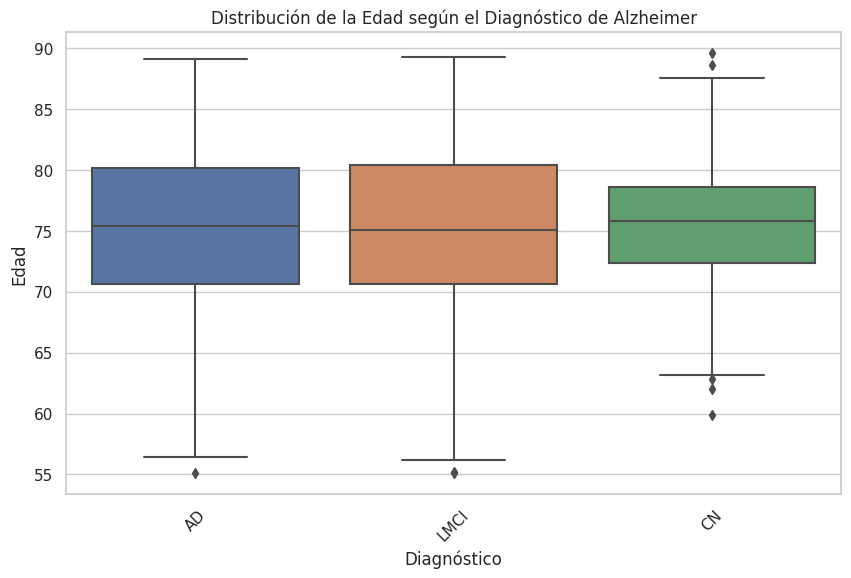

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
data = pd.read_csv(url_datos_original)

# Crear un gráfico de caja para comparar la edad según el diagnóstico
plt.figure(figsize=(10, 6))
sns.boxplot(x='DX', y='AGE', data=data)
plt.title('Distribución de la Edad según el Diagnóstico de Alzheimer')
plt.xlabel('Diagnóstico')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

Proporción de pacientes con genotipo APOE4: 0.37261146496815284


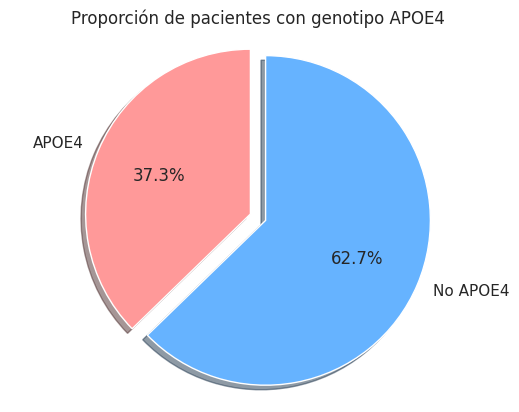

In [43]:
import pandas as pd

# Cargar los datos
df = pd.read_csv(url_datos_original)

# Calcular la proporción de pacientes con el genotipo APOE4
apoE4_count = df[df['APOE4'] == 1]['APOE4'].count()
total_count = df['APOE4'].count()
proporcion_apoE4 = apoE4_count / total_count

print("Proporción de pacientes con genotipo APOE4:", proporcion_apoE4)

import matplotlib.pyplot as plt

# Crear un gráfico de torta para visualizar la proporción
labels = 'APOE4', 'No APOE4'
sizes = [proporcion_apoE4, 1 - proporcion_apoE4]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Resaltar la primera porción (APOE4)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Para que el gráfico sea un círculo.

plt.title('Proporción de pacientes con genotipo APOE4')
plt.show()

<Figure size 1000x600 with 0 Axes>

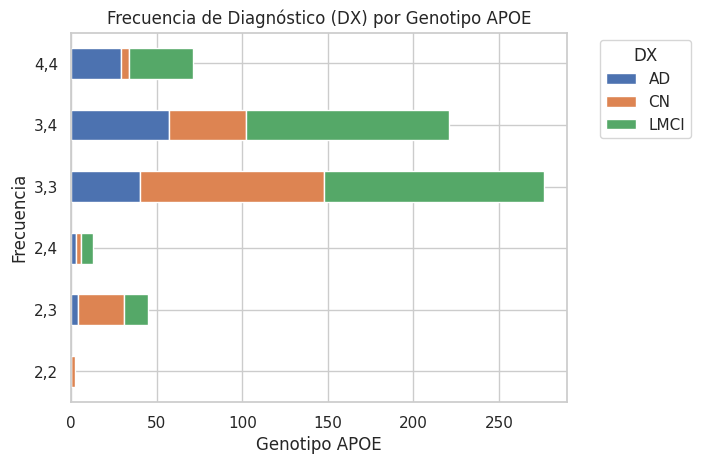

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv(url_datos_original)

# Crear un gráfico de barras o de mosaico
plt.figure(figsize=(10, 6))

# Contar las frecuencias de DX por genotipo APOE
frequencies = df.groupby('APOE Genotype')['DX'].value_counts().unstack().fillna(0)

# Crear el gráfico de barras horizontales
frequencies.plot(kind='barh', stacked=True)
plt.xlabel('Genotipo APOE')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Diagnóstico (DX) por Genotipo APOE')
plt.legend(title='DX', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

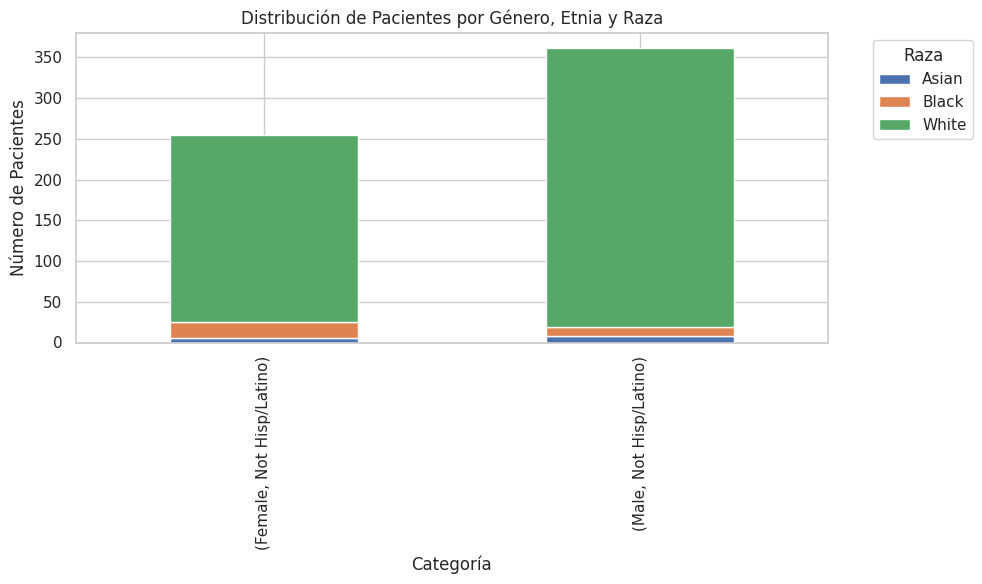

In [53]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv(url_datos_original)

# Filtrar barras que tengan más de 10 pacientes
data_filtrada = data[data['PTGENDER'].notna() & data['PTETHCAT'].notna() & data['PTRACCAT'].notna()]
data_filtrada = data_filtrada.groupby(['PTGENDER', 'PTETHCAT', 'PTRACCAT']).size().unstack().fillna(0)
data_filtrada = data_filtrada[data_filtrada.sum(axis=1) > 10]

# Crear el gráfico de barras apiladas
data_filtrada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Pacientes por Género, Etnia y Raza')
plt.xlabel('Categoría')
plt.ylabel('Número de Pacientes')
plt.legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

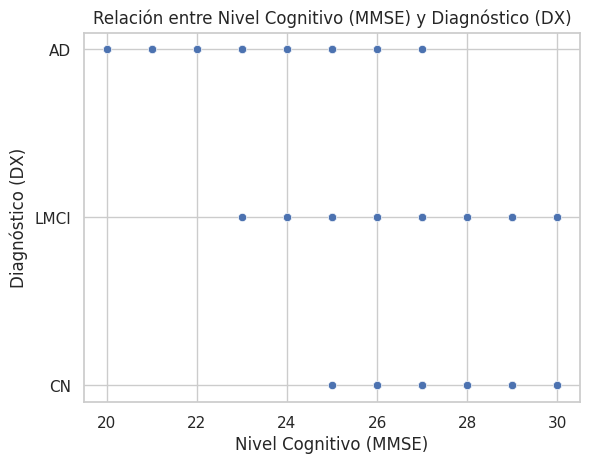

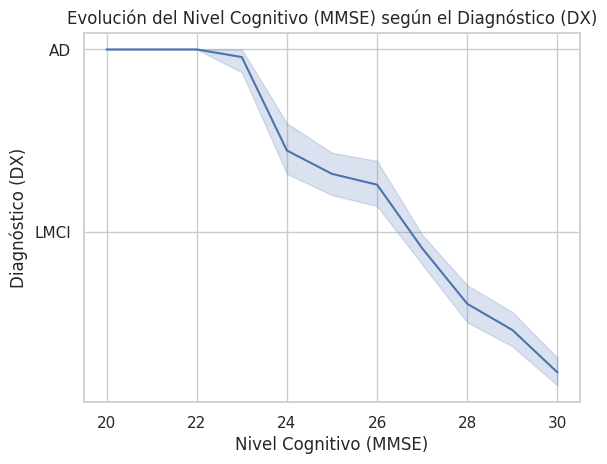

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
datos = pd.read_csv(url_datos_original)

# Crear un gráfico de dispersión
sns.scatterplot(data=datos, x='MMSE', y='DX')
plt.title('Relación entre Nivel Cognitivo (MMSE) y Diagnóstico (DX)')
plt.xlabel('Nivel Cognitivo (MMSE)')
plt.ylabel('Diagnóstico (DX)')
plt.show()

# Crear un gráfico de línea para mostrar la evolución del MMSE según el diagnóstico
sns.lineplot(data=datos, x='MMSE', y='DX')
plt.title('Evolución del Nivel Cognitivo (MMSE) según el Diagnóstico (DX)')
plt.xlabel('Nivel Cognitivo (MMSE)')
plt.ylabel('Diagnóstico (DX)')
plt.show()

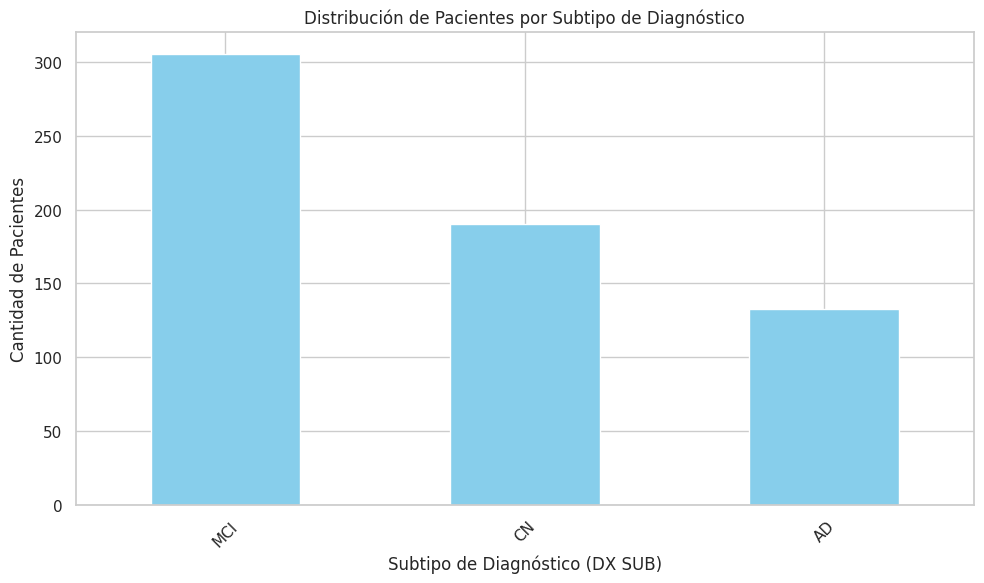

In [47]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv(url_datos_original)

# Contar la cantidad de pacientes por subtipo de diagnóstico (DX SUB)
diagnosis_counts = df['DX_SUB'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Pacientes por Subtipo de Diagnóstico')
plt.xlabel('Subtipo de Diagnóstico (DX SUB)')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()